In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 827.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


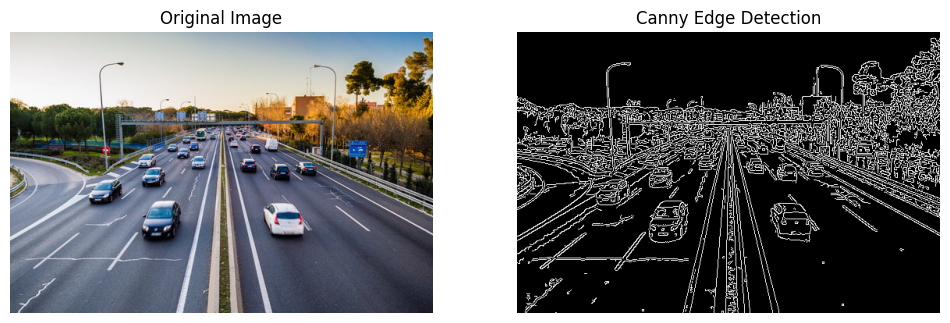

In [ ]:
#Task 1.1

# Import libraries
import cv2
import matplotlib.pyplot as plt


image_path = '/content/road.jpg'
image = cv2.imread(image_path)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)


plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()



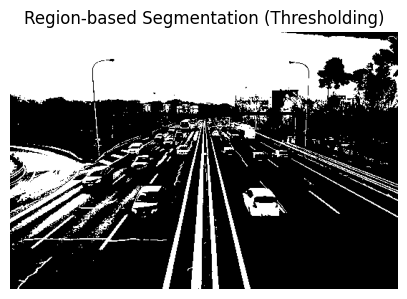

In [ ]:
import cv2
import matplotlib.pyplot as plt


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#  T1.2: Region-based Segmentation using Thresholding

# Apply Otsu's Thresholding
_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(5, 5))
plt.imshow(thresh, cmap='gray')
plt.title('Region-based Segmentation (Thresholding)')
plt.axis('off')
plt.show()


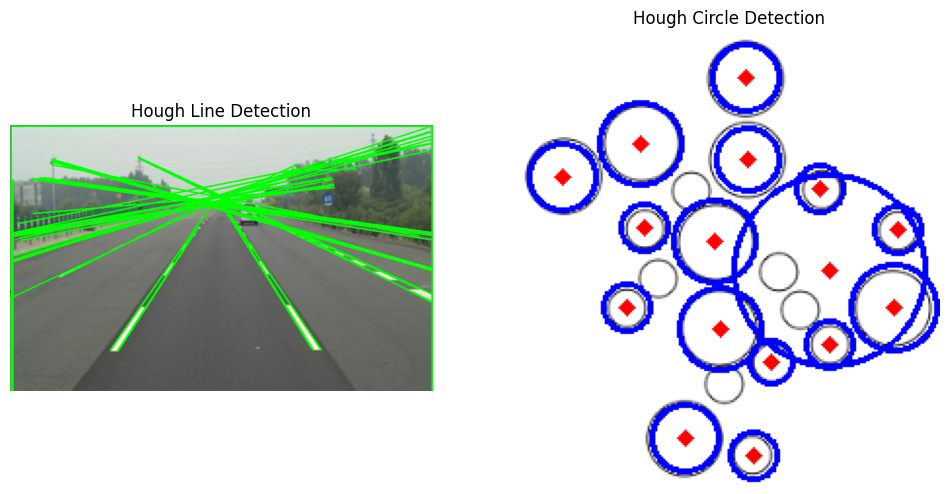

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load edge-detected image for line detection
image = cv2.imread('/content/Road_Image.jpg')  # Load original image
edges = cv2.Canny(image, 50, 150)  # Example edge detection

# Hough Transform for Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=68, minLineLength=15, maxLineGap=250)
line_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green lines

# Load image for circle detection
eye_image = cv2.imread('/content/circles image.png')
gray = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9, 9), 2)  # Apply Gaussian Blur

# Detect circles
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
    param1=100, param2=40, minRadius=10, maxRadius=100
)

circle_image = eye_image.copy()


if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(circle_image, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)  # Outer circle
        cv2.circle(circle_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)  #center


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Circle Detection')
plt.axis('off')

plt.show()


0: 448x640 16 cars, 185.3ms
Speed: 4.5ms preprocess, 185.3ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


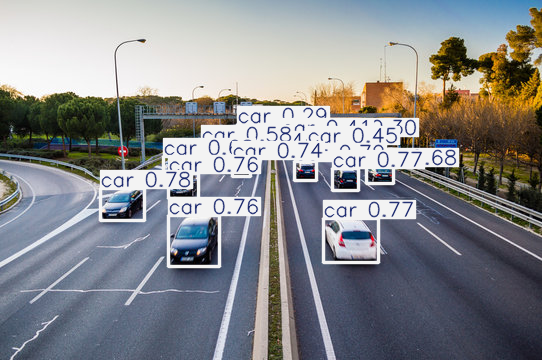

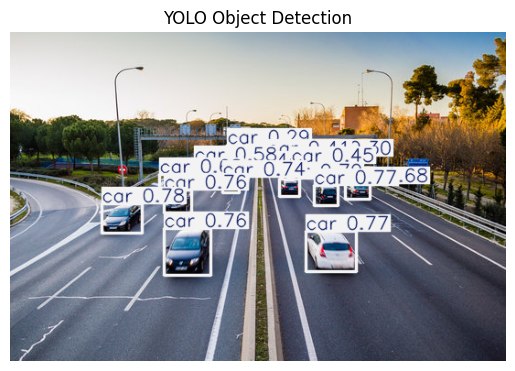

In [ ]:
#T2.1: Object Detection using YOLO (You Only Look Once)



# Load the YOLO model
yolo_model = YOLO('yolov8n.pt')  # Using YOLOv8 nano for faster convergence

# Load and display the image
image_path = '/content/road.jpg'
image = cv2.imread(image_path)

# Perform object detection
results = yolo_model(image)[0]  # Access the first element of the returned list

# Method 1: Display results using YOLO's built-in visualization
results.show()

# Method 2: Display using matplotlib (for Colab environments)
annotated_frame = results.plot()  # Get the image with detections drawn
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.title('YOLO Object Detection')
plt.axis('off')
plt.show()


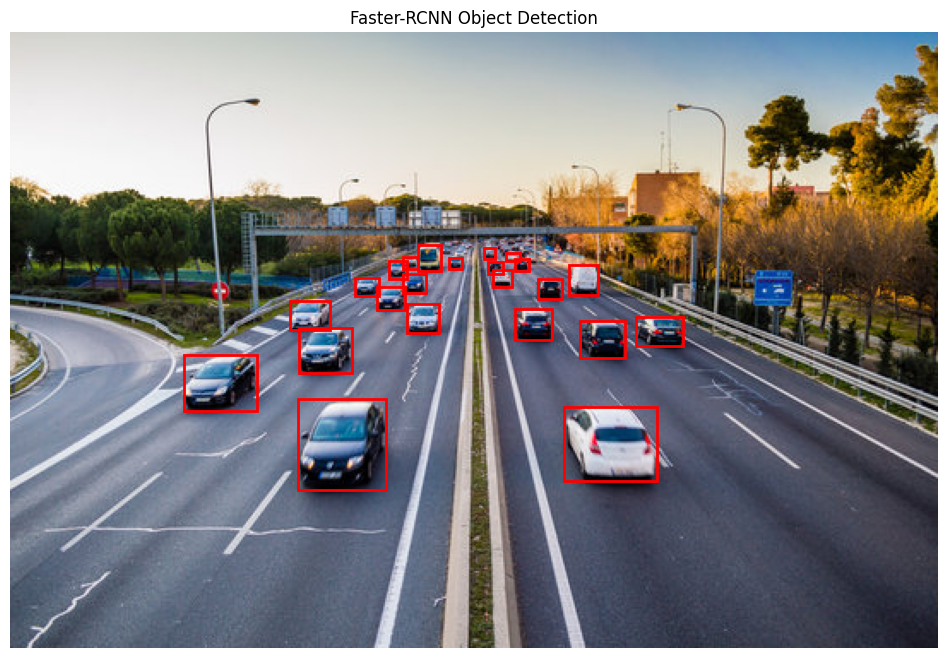

In [ ]:
#T2.2: Object Detection using RCNN (Faster-RCNN via torchvision)


!pip install torch torchvision opencv-python


import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


# Load the pretrained Faster R-CNN model
rcnn_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
rcnn_model.eval()


image_path = '/content/road.jpg'
image = Image.open(image_path)
transform = transforms.Compose([transforms.ToTensor()])
input_tensor = transform(image).unsqueeze(0)

# Perform object detection
with torch.no_grad():
    outputs = rcnn_model(input_tensor)

# Display image with bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)
for idx, box in enumerate(outputs[0]['boxes']):
    if outputs[0]['scores'][idx] > 0.5:  # Confidence threshold
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
plt.title('Faster-RCNN Object Detection')
plt.axis('off')
plt.show()
